Part I:
2. Define an RL Environment

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
from collections import defaultdict


def state_to_index(state, grid_size=5):
    return state[0] * grid_size + state[1]


def epsilon_greedy(Q, state, epsilon, env):
    valid_actions = env.get_valid_actions()

    if not valid_actions:
        return None

    if np.random.rand() < epsilon:
        return np.random.choice(valid_actions)
    else:
        q_values = [Q[state_index(state)][a] for a in valid_actions]
        return valid_actions[np.argmax(q_values)]



class Lawnmower:

    def __init__(self):
        self.grid_size = 5

        self.action_space = [0, 1, 2, 3]  # Up, Right, Down, Left
        self.observation_space = [(i, j) for i in range(self.grid_size)
                                  for j in range(self.grid_size)]

        self.start_pos = (4, 0)
        self.goal_pos = (0, 4)
        self.batteries = [(1, 1), (2, 2), (3, 1), (1, 3), (3, 3)]
        self.rocks = [(1, 2), (2, 1), (3, 2), (2, 3)]

        self.current_pos = None
        self.done = False
        self.visited = set()

    def reset(self):
        self.current_pos = self.start_pos
        self.done = False
        self.visited = set()
        self.visited.add(self.current_pos)
        return self.current_pos


    def step(self, action):
      row, col = self.current_pos

    # Compute next position
      if action == 0:  # Up
        next_row, next_col = max(0, row - 1), col
      elif action == 1:  # Right
        next_row, next_col = row, min(self.grid_size - 1, col + 1)
      elif action == 2:  # Down
        next_row, next_col = min(self.grid_size - 1, row + 1), col
      else:  # Left
        next_row, next_col = row, max(0, col - 1)

      next_pos = (next_row, next_col)

    # Assign reward
      if next_pos in self.visited:
        reward = -2  # revisit penalty
      elif next_pos == self.goal_pos:
        reward = 10
        self.done = True
      elif next_pos in self.batteries:
        reward = 5
      elif next_pos in self.rocks:
        reward = -5
      else:
        reward = -1  # empty cell

      self.visited.add(next_pos)
      self.current_pos = next_pos

      return self.current_pos, reward, self.done, {}



    def get_valid_actions(self):
      row, col = self.current_pos
      actions = []

      # Up
      if row > 0 and (row-1, col) not in self.visited:
          actions.append(0)
     # Right
      if col < self.grid_size-1 and (row, col+1) not in self.visited:
        actions.append(1)
    # Down
      if row < self.grid_size-1 and (row+1, col) not in self.visited:
        actions.append(2)
    # Left
      if col > 0 and (row, col-1) not in self.visited:
        actions.append(3)

      return actions

    def render(self):
        plt.figure(figsize=(6, 6))

        grid = np.zeros((self.grid_size, self.grid_size))

        for pos in self.batteries:
            grid[pos] = 1
        for pos in self.rocks:
            grid[pos] = 2
        grid[self.goal_pos] = 3
        grid[self.current_pos] = 4

        cmap = colors.ListedColormap(['grey', 'lightyellow', 'brown', 'green', 'teal'])
        bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        plt.imshow(grid, cmap=cmap, norm=norm)

        for i in range(self.grid_size + 1):
            plt.axhline(i - 0.5, color='black', linewidth=2)
            plt.axvline(i - 0.5, color='black', linewidth=2)

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                plt.text(j, i, f'({i},{j})', ha='center', va='center',
                         fontsize=8, color='black', alpha=0.4)

        legend_elements = [
            mpatches.Patch(color='teal', label='Agent'),
            mpatches.Patch(color='green', label='Goal: +10'),
            mpatches.Patch(color='lightyellow', label='Battery: +5'),
            mpatches.Patch(color='brown', label='Rock: -5'),
            mpatches.Patch(color='grey', label='Empty: 0')
        ]
        plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

        plt.title('Lawnmower Grid World', fontsize=14, fontweight='bold')
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.tight_layout()
        plt.show()





3. Run agent 10 timesteps

Step 1
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


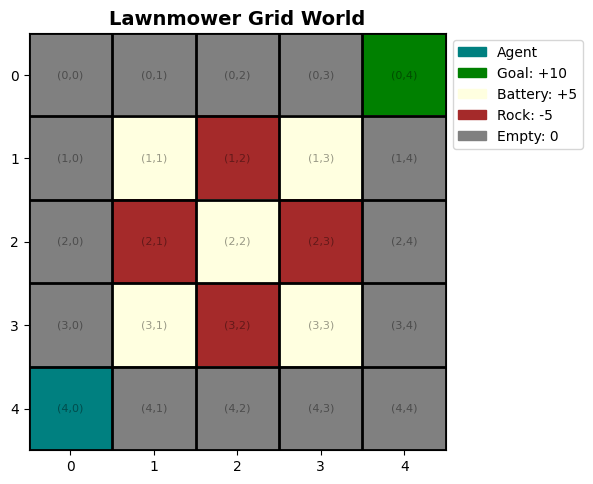

Step 2
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


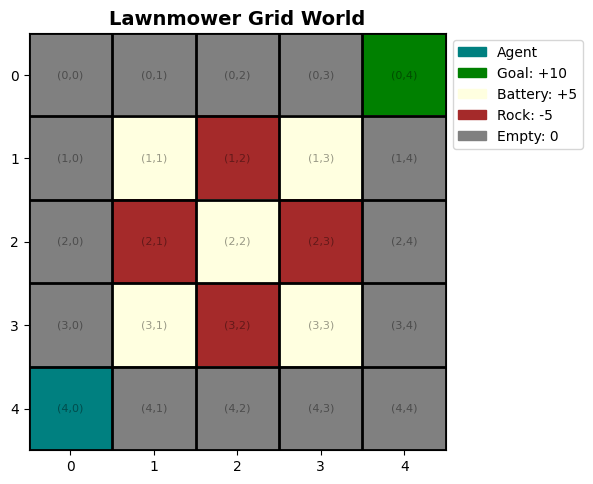

Step 3
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


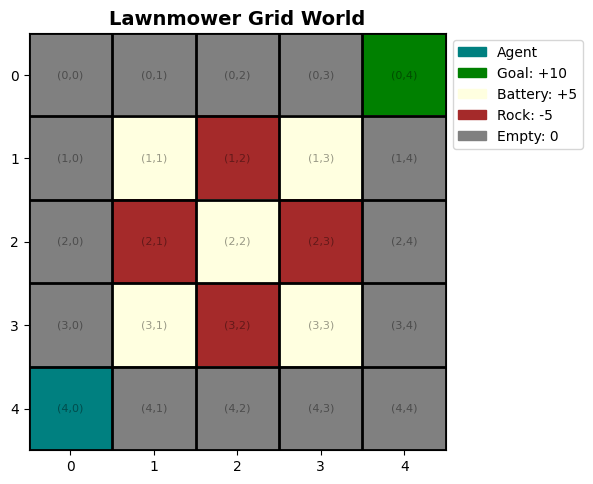

Step 4
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


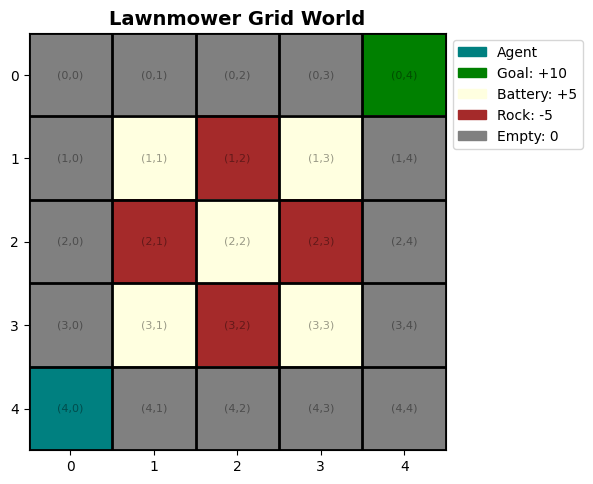

Step 5
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


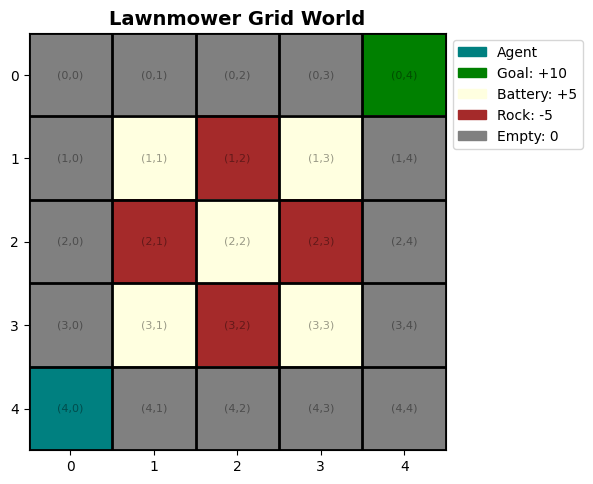

Step 6
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


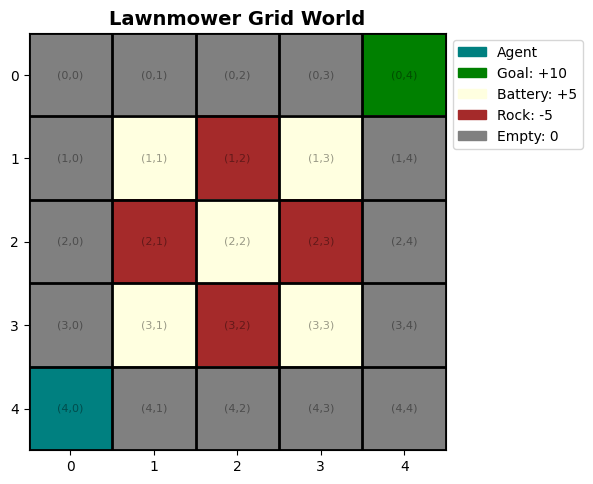

Step 7
Current State: (4, 0)
Action Taken: 2
Next State: (4, 0)
Reward: -2
Done: False


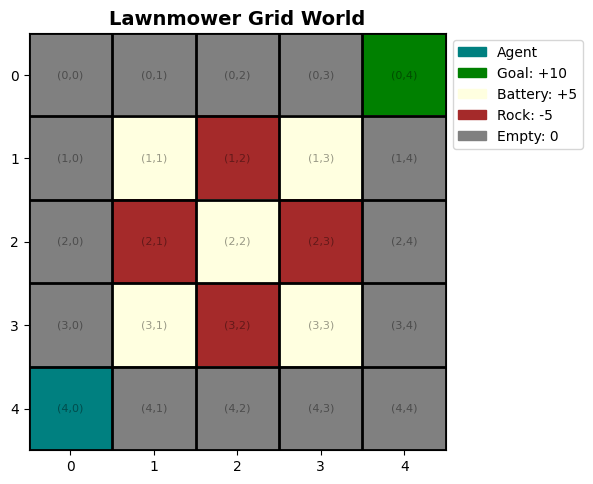

Step 8
Current State: (4, 0)
Action Taken: 1
Next State: (4, 1)
Reward: -1
Done: False


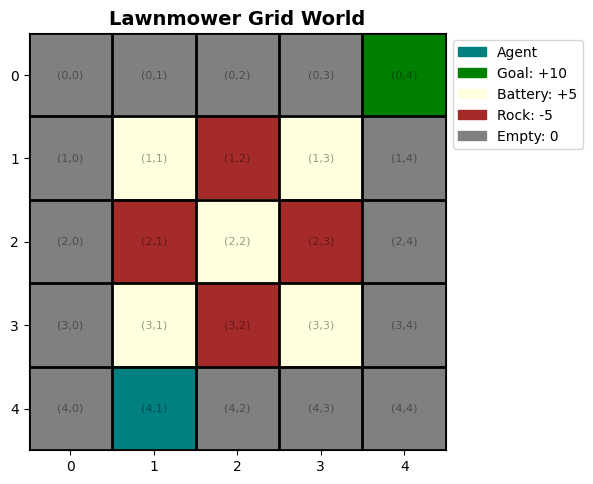

Step 9
Current State: (4, 1)
Action Taken: 1
Next State: (4, 2)
Reward: -1
Done: False


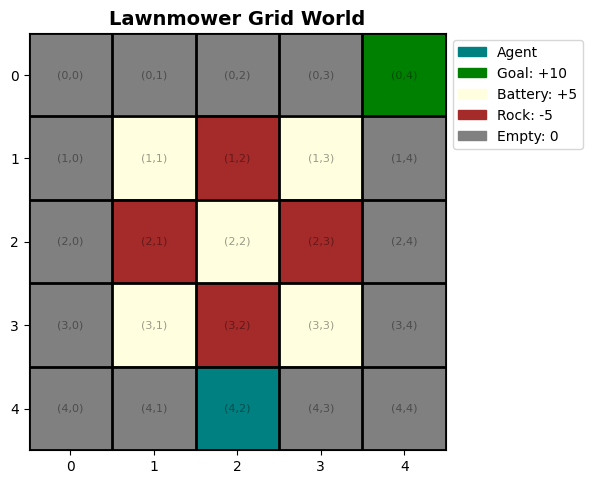

Step 10
Current State: (4, 2)
Action Taken: 0
Next State: (3, 2)
Reward: -5
Done: False


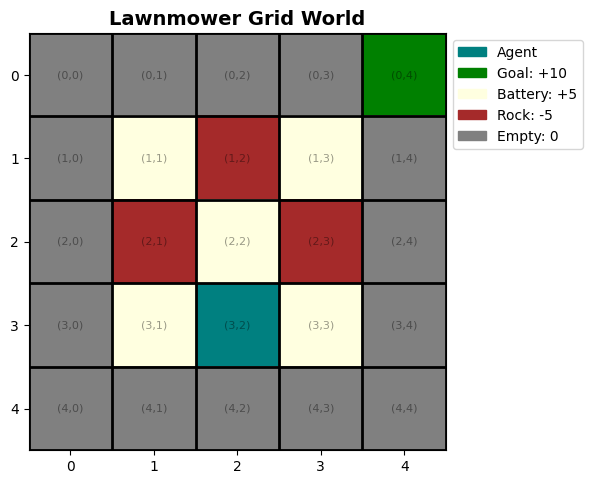

In [ ]:
import random

env = Lawnmower()
state = env.reset()

for t in range(10):
    if env.done:
        print("\nEpisode finished early at step", t)
        break

    action = random.choice(env.action_space)

    next_state, reward, done, info = env.step(action)

    print(f"Step {t+1}")
    print(f"Current State: {state}")
    print(f"Action Taken: {action}")
    print(f"Next State: {next_state}")
    print(f"Reward: {reward}")
    print(f"Done: {done}")

    env.render()

    state = next_state


4. Describe the environment:

The envirnment is defined as a class called Lawnmower. It is a deterministic environment as if a valid action is taken, the agent will take some action. There is no randomness associated witht this action and next state.

**States:**
It is a 5x5 grid and hence total possible states are 25. Each state could either an empty space with reward -1 or rock with reward -5 or battery with reward +5 or the goal state with reward +10.

**Actions:** total 4 possible actions in the environment - Up represented by value 0, right by 1, down by 2 and left by 3. In up action, the agent moves (row-1,col), in right it moves (row,col+1), in down it moves (row+1, col) and for left it moves(row, col-1). Only exception being a boundary wall. If a boundary is encountered, the agent stays in the same position.

**Rewards**: Total 4 types of rewards are -1 for empty space, -5 for rock states, +5 for batteries and +10 for goal state.

**Main Objective of agent** is to go from initial position (4,0) to goal state (0,4) while maximising cumulative reward.

Defined functions help to:

**Step():** Take a step for the agent. It is responsible to change the position of the agent according to the passed action. Additionally, it assigns reward according to the state the agent has landed in after taking the passed action.

**reset():** positions the agent to the initial position and removes the game ended flag.

**render():** renders the grid with the positions of each state and the agent's current position in the grid.

5. Visualization of the environment

In [ ]:
def visualize_environment(env):
    plt.figure(figsize=(6, 6))

    grid = np.zeros((env.grid_size, env.grid_size))

    for pos in env.batteries:
        grid[pos] = 1

    for pos in env.rocks:
        grid[pos] = 2

    grid[env.goal_pos] = 3

    grid[env.start_pos] = 4

    cmap = colors.ListedColormap(['grey', 'lightyellow', 'brown', 'green', 'teal'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(grid, cmap=cmap, norm=norm)

    for i in range(env.grid_size + 1):
        plt.axhline(i - 0.5, color='black', linewidth=2)
        plt.axvline(i - 0.5, color='black', linewidth=2)

    for i in range(env.grid_size):
        for j in range(env.grid_size):
            plt.text(j, i, f'({i},{j})', ha='center', va='center',
                     fontsize=8, color='black', alpha=0.4)

    legend_elements = [
        mpatches.Patch(color='teal', label='Start Position (Agent)'),
        mpatches.Patch(color='green', label='Goal (+10)'),
        mpatches.Patch(color='lightyellow', label='Battery (+5)'),
        mpatches.Patch(color='brown', label='Rock (-5)'),
        mpatches.Patch(color='grey', label='Empty (-1)')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    plt.title('Initial Environment Layout (Step 5 Visualization)', fontsize=14, fontweight='bold')
    plt.xticks(range(env.grid_size))
    plt.yticks(range(env.grid_size))
    plt.tight_layout()
    plt.show()


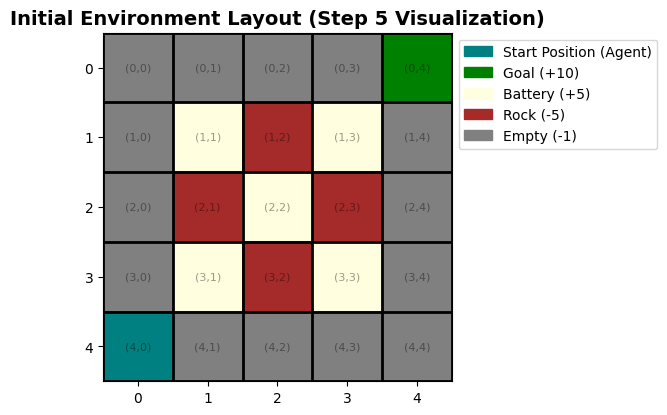

In [ ]:
env = Lawnmower()
visualize_environment(env)


6. How to ensure safety of your environment

Only one of four deterministic actions is permitted for the agent and each action is automatically clipped to keep the agent inside the grid's bounds and avoid risky moves. The agent is guided away from unsafe activity through reinforcement signals when hazardous places such rocks are clearly identified and penalized with negative incentives. The environment ensures that the agent learns safe navigation patterns without entering ambiguous or hazardous states by giving clear and consistent feedback for each action. All things considered the visible reward structure, regular transitions and restricted state-space combine to provide a secure setting for experimenting with reinforcement learning.

7. Contribution Summary



  Name           Contribution
               
  Dikshant            50% <br>

  Saba Minaz Taj      50%




Part II

1. Implement SARSA algorithm

In [ ]:
def state_to_index(state):
    rows, cols = state
    return rows * env.grid_size + cols



In [ ]:
def epsilon_greedy(Q, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.choice([0,1,2,3])
    else:
        s_idx = state_to_index(state)
        return np.argmax(Q[s_idx])


In [ ]:
def sarsa(env, episodes=200, alpha=0.1, gamma=0.99,
          epsilon=0.15, epsilon_decay=0.995, max_steps=1000):

    Q = np.zeros((env.grid_size * env.grid_size, len(env.action_space)))
    rewards_per_episode = []
    eps_values = []
    successes = []
    steps_per_episode = []

    for ep in range(episodes):

        eps_values.append(epsilon)
        state = env.reset()
        visited_states = set()
        total_reward = 0
        steps = 0

        action = epsilon_greedy(Q, state, epsilon)

        while steps < max_steps:
            next_state, reward, done, _ = env.step(action)
            total_reward += reward

            # Penalize loops
            if next_state in visited_states:
                reward -= 0.5
            visited_states.add(next_state)

            next_action = epsilon_greedy(Q, next_state, epsilon)

            s = state_to_index(state)
            s_next = state_to_index(next_state)

            Q[s, action] += alpha * (
                reward + gamma * Q[s_next, next_action] - Q[s, action]
            )

            state = next_state
            action = next_action
            steps += 1

            if done:
                break

        rewards_per_episode.append(total_reward)
        successes.append(1 if env.current_pos == env.goal_pos else 0)
        steps_per_episode.append(steps)

        epsilon = max(0.01, epsilon * epsilon_decay)


    avg_reward = np.mean(rewards_per_episode)
    success_rate = np.mean(successes)
    avg_steps = np.mean(steps_per_episode)

    print(f"[SARSA] Average Reward: {avg_reward:.2f}")
    print(f"[SARSA] Success Rate: {success_rate * 100:.2f}%")
    print(f"[SARSA] Average Steps per Episode: {avg_steps:.2f}")

    return Q, rewards_per_episode, eps_values, successes, steps_per_episode


In [ ]:
env = Lawnmower()
state = env.reset()

Q, rewards_per_episode, eps_values, successes, steps_per_episode = sarsa(env, episodes=600, alpha=0.1, gamma=0.99, epsilon=0.15)

print("Training complete")


[SARSA] Average Reward: 10.94
[SARSA] Success Rate: 100.00%
[SARSA] Average Steps per Episode: 10.93
Training complete


2. Evaluation Results

2. a Printing initial and trained Q-table

In [ ]:
initial_Q = np.zeros((env.grid_size * env.grid_size, 4))
print("Initial Q-table:\n")
print(initial_Q)


Initial Q-table:

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print("\nTrained Q-table:\n")
print(Q)



Trained Q-table:

[[-1.21130345 -0.85672643 -0.88206459 -1.20817274]
 [-0.49023879  3.6434924  -0.68730309 -0.47285577]
 [-0.475       7.35963073 -0.79589417 -0.49163513]
 [ 0.21235105  9.99543224 -0.20510987  0.20113511]
 [ 0.          0.          0.          0.        ]
 [-1.01848535  1.82693963 -0.98818843 -1.43355106]
 [ 0.33208311 -1.2030192  -1.21993408 -1.20040085]
 [-0.25       12.00559862  0.          0.        ]
 [ 8.49349056 -0.19       -0.2005     -0.4346007 ]
 [10.          5.05233931  1.27208884  3.49154334]
 [-0.72682032 -1.26312048 -1.11312258 -1.24458208]
 [ 2.36583336 -0.10754805  0.          0.        ]
 [ 4.78902918 -1.33718    -1.31368046 -1.7154492 ]
 [ 8.02795578 -0.147025    0.          0.        ]
 [ 8.75351152  2.26179606  1.72164786  0.08815972]
 [-1.59360837 11.84958614  1.78178266  1.56410923]
 [-2.814591   -1.11892357  6.96683725  3.19338855]
 [ 7.21995103  0.78031199  0.59556648  0.36199798]
 [-0.70876075  6.56746723  2.51225117 -1.89046006]
 [ 7.6123361

2.b Plotting the total reward per episode graph

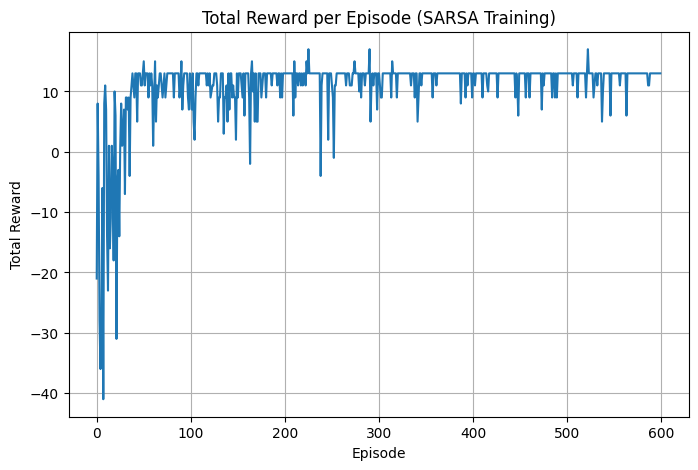

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode (SARSA Training)")
plt.grid(True)
plt.show()


2. c Epsilon Decay Graph

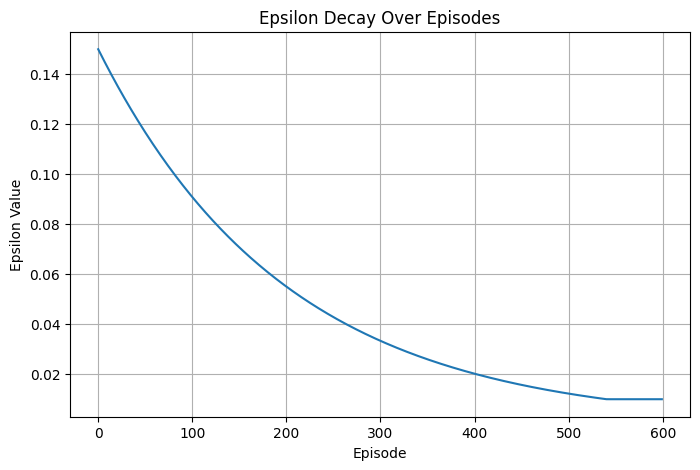

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(eps_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.title("Epsilon Decay Over Episodes")
plt.grid(True)
plt.show()

2. d Greedy policy evaluation

In [ ]:
def run_greedy_policy(env, Q, episodes=10, max_steps=100):
    total_rewards = []
    successes = []
    steps_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        step_count = 0
        reward_sum = 0

        print(f"\nEpisode {ep + 1}:")

        while not done and step_count < max_steps:
            s_idx = state_to_index(state)
            greedy_action = np.argmax(Q[s_idx])

            print(f"  Step {step_count + 1} | State={state}, Action={greedy_action}")

            next_state, reward, done, _ = env.step(greedy_action)
            reward_sum += reward
            state = next_state
            step_count += 1

        total_rewards.append(reward_sum)
        successes.append(1 if env.current_pos == env.goal_pos else 0)
        steps_per_episode.append(step_count)

    print("\n--- Greedy Policy Summary ---")
    print(f"Average Reward       : {np.mean(total_rewards):.2f}")
    print(f"Success Rate         : {np.mean(successes) * 100:.2f}%")
    print(f"Average Steps / Ep   : {np.mean(steps_per_episode):.2f}")

    return total_rewards, successes, steps_per_episode

In [ ]:
greedy_rewards, greedy_success, greedy_steps = run_greedy_policy(env, Q)
print("Greedy episode rewards:", greedy_rewards)


Episode 1:
  Step 1 | State=(4, 0), Action=0
  Step 2 | State=(3, 0), Action=1
  Step 3 | State=(3, 1), Action=2
  Step 4 | State=(4, 1), Action=1
  Step 5 | State=(4, 2), Action=1
  Step 6 | State=(4, 3), Action=0
  Step 7 | State=(3, 3), Action=1
  Step 8 | State=(3, 4), Action=0
  Step 9 | State=(2, 4), Action=0
  Step 10 | State=(1, 4), Action=0

Episode 2:
  Step 1 | State=(4, 0), Action=0
  Step 2 | State=(3, 0), Action=1
  Step 3 | State=(3, 1), Action=2
  Step 4 | State=(4, 1), Action=1
  Step 5 | State=(4, 2), Action=1
  Step 6 | State=(4, 3), Action=0
  Step 7 | State=(3, 3), Action=1
  Step 8 | State=(3, 4), Action=0
  Step 9 | State=(2, 4), Action=0
  Step 10 | State=(1, 4), Action=0

Episode 3:
  Step 1 | State=(4, 0), Action=0
  Step 2 | State=(3, 0), Action=1
  Step 3 | State=(3, 1), Action=2
  Step 4 | State=(4, 1), Action=1
  Step 5 | State=(4, 2), Action=1
  Step 6 | State=(4, 3), Action=0
  Step 7 | State=(3, 3), Action=1
  Step 8 | State=(3, 4), Action=0
  Step 9 |

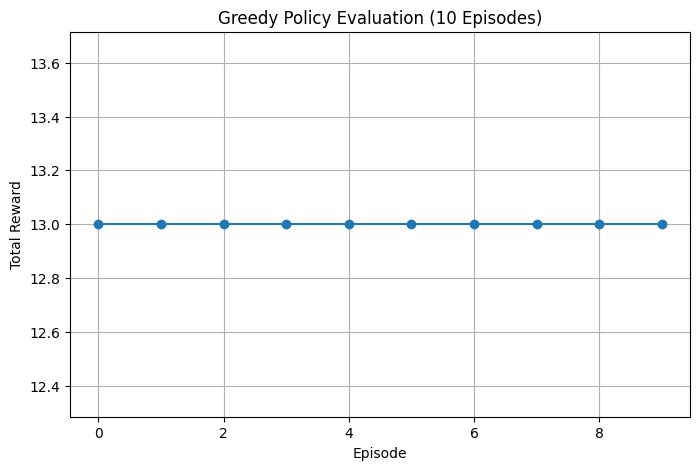

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(greedy_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Greedy Policy Evaluation (10 Episodes)")
plt.grid(True)
plt.show()


3. Select two hyperparameters tuning for better SARSA. And try 3 different values for each parameters.

Discount factor (γ)

In [ ]:
def run_sarsa(env, Q_table, gamma=0.8, epsilon_start=1.0, epsilon_min=0.05, epsilon_decay=0.99, episodes=300):
    reward_history = []
    success_list = []
    steps_list = []
    rewards_gamma = []
    epsilon_history = []

    epsilon = epsilon_start

    num_states = env.grid_size * env.grid_size

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        s_idx = state_to_index(state)


        if np.random.rand() < epsilon:
            action = np.random.choice(len(env.action_space))
        else:
            action = np.argmax(Q_table[s_idx])

        while not done:
            next_state, reward, done, _ = env.step(action)
            s_next_idx = state_to_index(next_state)


            if np.random.rand() < epsilon:
                next_action = np.random.choice(len(env.action_space))
            else:
                next_action = np.argmax(Q_table[s_next_idx])


            Q_table[s_idx][action] += 0.1 * (
                reward + gamma * Q_table[s_next_idx][next_action] - Q_table[s_idx][action]
            )

            state = next_state
            s_idx = s_next_idx
            action = next_action

            total_reward += reward
            steps += 1

        reward_history.append(total_reward)
        success_list.append(1 if env.current_pos == env.goal_pos else 0)
        steps_list.append(steps)
        epsilon_history.append(epsilon)


        if ep % 50 == 0:
            print(f"[SARSA] Episode {ep} | Reward: {total_reward} | Success: {success_list[-1]} | Epsilon: {epsilon:.3f}")

        epsilon = max(epsilon * epsilon_decay, epsilon_min)


    print("\nTraining Finished!")
    print(f"Max Reward: {np.max(reward_history):.2f}")
    print(f"Final Success Rate: {np.mean(success_list)*100:.1f}%")
    print(f"Final Epsilon: {epsilon:.3f}\n")

    return reward_history, success_list, steps_list,epsilon_history, Q_table


Choosing 3 different values of gamma to test.

In [ ]:
gamma_values = [0.9, 0.2, 0.85]
gamma_results = []
max_rewards_per_gamma = {}

for g in gamma_values:
    print("\n")
    print(f"Running SARSA with gamma = {g}")
    print("")

    num_states = env.grid_size * env.grid_size
    num_actions = len(env.action_space)

    Q_try = np.zeros((num_states, num_actions))

    avg_rewards, success_list, steps_list,epsilon_history, Q_table = run_sarsa(
        env=env,
        Q_table=Q_try,
        gamma=g,
        epsilon_start=1.0,
        epsilon_min=0.05,
        epsilon_decay=0.99,
        episodes=300
    )

    max_rewards_per_gamma[g] = np.max(avg_rewards)

    avg_reward_val = np.mean(avg_rewards)
    success_rate_val = np.mean(success_list) * 100

    gamma_results.append([g, avg_reward_val, success_rate_val])

print("\n Gamma Tuning Results")
for row in gamma_results:
    print(f"Gamma={row[0]} | Avg Reward={row[1]:.2f} | Success={row[2]:.1f}%")




Running SARSA with gamma = 0.9

[SARSA] Episode 0 | Reward: -3 | Success: 1 | Epsilon: 1.000
[SARSA] Episode 50 | Reward: 9 | Success: 1 | Epsilon: 0.605
[SARSA] Episode 100 | Reward: 3 | Success: 1 | Epsilon: 0.366
[SARSA] Episode 150 | Reward: 5 | Success: 1 | Epsilon: 0.221
[SARSA] Episode 200 | Reward: 9 | Success: 1 | Epsilon: 0.134
[SARSA] Episode 250 | Reward: 9 | Success: 1 | Epsilon: 0.081

Training Finished!
Max Reward: 17.00
Final Success Rate: 100.0%
Final Epsilon: 0.050



Running SARSA with gamma = 0.2

[SARSA] Episode 0 | Reward: -376 | Success: 1 | Epsilon: 1.000
[SARSA] Episode 50 | Reward: -121 | Success: 1 | Epsilon: 0.605
[SARSA] Episode 100 | Reward: -14 | Success: 1 | Epsilon: 0.366
[SARSA] Episode 150 | Reward: 7 | Success: 1 | Epsilon: 0.221
[SARSA] Episode 200 | Reward: 3 | Success: 1 | Epsilon: 0.134
[SARSA] Episode 250 | Reward: 13 | Success: 1 | Epsilon: 0.081

Training Finished!
Max Reward: 17.00
Final Success Rate: 100.0%
Final Epsilon: 0.050



Running 

In [ ]:
best_gamma = max(max_rewards_per_gamma, key=max_rewards_per_gamma.get)
best_reward = max_rewards_per_gamma[best_gamma]

print(f"Best gamma: {best_gamma} with max reward: {best_reward:.2f}")


Best gamma: 0.9 with max reward: 17.00


Number of episodes

In [ ]:
episode_values = [200, 400, 600]
episode_results = []
best_gamma = max(max_rewards_per_gamma, key=max_rewards_per_gamma.get)
best_ep_reward = {}


for ep_count in episode_values:
    print("\n")
    print(f"Running SARSA with episodes = {ep_count}")
    print("\n")

    num_states = env.grid_size * env.grid_size
    num_actions = len(env.action_space)


    Q_try = np.zeros((num_states, num_actions))

    avg_rewards, success_list, steps_list, epsilon_history, Q_table = run_sarsa(
        env=env,
        Q_table=Q_try,
        gamma=best_gamma,
        epsilon_start=1.0,
        epsilon_min=0.05,
        epsilon_decay=0.99,
        episodes=ep_count
    )

    max_reward_val = np.max(avg_rewards)
    best_ep_reward[ep_count] = np.max(avg_rewards)
    success_val = np.mean(success_list) * 100

    episode_results.append([ep_count, max_reward_val, success_val])


print("\n Episode Count Tuning Results")
for row in episode_results:
    print(f"Episodes={row[0]} | Max Reward={row[1]:.2f} | Success={row[2]:.1f}%")




Running SARSA with episodes = 200


[SARSA] Episode 0 | Reward: -21 | Success: 1 | Epsilon: 1.000
[SARSA] Episode 50 | Reward: 4 | Success: 1 | Epsilon: 0.605
[SARSA] Episode 100 | Reward: 3 | Success: 1 | Epsilon: 0.366
[SARSA] Episode 150 | Reward: -9 | Success: 1 | Epsilon: 0.221

Training Finished!
Max Reward: 13.00
Final Success Rate: 100.0%
Final Epsilon: 0.134



Running SARSA with episodes = 400


[SARSA] Episode 0 | Reward: -318 | Success: 1 | Epsilon: 1.000
[SARSA] Episode 50 | Reward: -22 | Success: 1 | Epsilon: 0.605
[SARSA] Episode 100 | Reward: 1 | Success: 1 | Epsilon: 0.366
[SARSA] Episode 150 | Reward: 13 | Success: 1 | Epsilon: 0.221
[SARSA] Episode 200 | Reward: 7 | Success: 1 | Epsilon: 0.134
[SARSA] Episode 250 | Reward: 11 | Success: 1 | Epsilon: 0.081
[SARSA] Episode 300 | Reward: 13 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 350 | Reward: 13 | Success: 1 | Epsilon: 0.050

Training Finished!
Max Reward: 16.00
Final Success Rate: 100.0%
Final Epsilon: 0.050



In [ ]:
best_ep_count = max(best_ep_reward, key=best_ep_reward.get)

best_reward = best_ep_reward[best_ep_count]

print("Best number of episodes=",best_ep_count," with reward=",best_reward)


Best number of episodes= 600  with reward= 17


Below is the detailed explaination of how the two heyperparametrs tuned affect the RL model:

**Discount factor (gamma) -** this value controls trade-off between immediate and future rewards. If the gamma is low, the agent will prioritize immediate rewards (Rt) and if gamma is high, the agent will prioritize future rewards. Hence, the optimal value of gamma depends on specific environment. We have taken a relatively higher gamma (0.85) value because in our environment, the goal was difficult to reach if gamma value was lower. This means our agent was priotizing immediate rewards and got stuck in endless loops to collect immediate rewards.

**Number of episodes -** Each episode starts with the agent at initial position and ends only if the agent has reached the terminal state or max number of steps per episodes has exceeded. Hence, number of episode is the number of times our agent interacts with the environment from start to finish during training. If there are too few episodes, the agent will not be able to explore the environment fully, influencing Q values to be unstable. More number of episodes is better as the agent will be able to interact with the environment more number of times but it takes more time and computational power. Therefore finding the middle spot where Q values become stable and time taken to train is also not inefficient is the best policy.


**Best hyperparamters -** The best hyperparameters recognised during tuning are:

*   optimal episodes: 200

*   best gamma: 0.85

NOTE: These values may change for different trainings but we have used them dynamically by making a dictionary such that the best hyperparametrs are used irragardless each time.





In [ ]:
#best model

best_results = []

num_states = env.grid_size * env.grid_size
num_actions = len(env.action_space)

Q_try = np.zeros((num_states, num_actions))

reward_history, success_list, steps_list, epsilon_history, Q_table_f = run_sarsa(
    env=env,
    Q_table=Q_try,
    gamma=best_gamma,
    epsilon_start=1.0,
    epsilon_min=0.05,
    epsilon_decay=0.99,
    episodes=best_ep_count
)

avg_reward_val = np.mean(reward_history)
success_rate_val = np.mean(success_list) * 100


print("\nBest Model Results:")
print(f"Gamma = {best_gamma}")
print(f"Episodes = {best_ep_count}")
print(f"Max Reward = {np.max(reward_history):.2f}")
print(f"Success Rate = {success_rate_val:.1f}%")





[SARSA] Episode 0 | Reward: -39 | Success: 1 | Epsilon: 1.000
[SARSA] Episode 50 | Reward: -37 | Success: 1 | Epsilon: 0.605
[SARSA] Episode 100 | Reward: 5 | Success: 1 | Epsilon: 0.366
[SARSA] Episode 150 | Reward: 13 | Success: 1 | Epsilon: 0.221
[SARSA] Episode 200 | Reward: 3 | Success: 1 | Epsilon: 0.134
[SARSA] Episode 250 | Reward: 9 | Success: 1 | Epsilon: 0.081
[SARSA] Episode 300 | Reward: 13 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 350 | Reward: 11 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 400 | Reward: 9 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 450 | Reward: 13 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 500 | Reward: 13 | Success: 1 | Epsilon: 0.050
[SARSA] Episode 550 | Reward: 10 | Success: 1 | Epsilon: 0.050

Training Finished!
Max Reward: 16.00
Final Success Rate: 100.0%
Final Epsilon: 0.050


Best Model Results:
Gamma = 0.9
Episodes = 600
Max Reward = 16.00
Success Rate = 100.0%


In [ ]:
#Initial Q table:

initial_Q = np.zeros((env.grid_size * env.grid_size, 4))
print("Initial Q-table:\n")
print(initial_Q)



Initial Q-table:

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print("\nTrained Q-table:\n")
print(Q_table_f)


Trained Q-table:

[[-3.32979911  1.98038324 -3.11525953 -3.06341282]
 [ 0.80117068  5.85294306 -1.54016878 -1.09624385]
 [ 1.55652007  7.99812145 -0.86266722  0.09100614]
 [ 4.67994115 10.          8.54629242  2.26306388]
 [ 0.          0.          0.          0.        ]
 [-1.19909984  8.3099413  -2.36193269  1.72021949]
 [ 3.88516209 -1.41822089 -3.71753297 -0.79909605]
 [-0.75395688  8.35508315 -1.25733863 -1.36155825]
 [ 7.34878804  2.28239735 -2.93735442 -2.07437755]
 [ 9.98544422  0.77860697 -2.20529112  0.48132063]
 [ 5.33625552 -2.58394491 -2.19712443 -0.03690247]
 [ 5.86319904 -0.99077684 -4.31994041 -3.37894417]
 [-3.4242203  -3.40845276 -3.33526622 -3.56794108]
 [ 4.104017   -2.6277325  -2.71150537 -1.44746536]
 [ 6.53097724 -2.72456779 -2.590917   -2.97418668]
 [ 3.88529044 -2.11947457 -3.31171122 -2.60451415]
 [-4.51064696 -3.41087958 -1.07933846  2.84579915]
 [-0.0281934   3.90609573 -3.52796938 -4.1332339 ]
 [-4.56451416  1.58281234 -2.77408633 -3.5021319 ]
 [ 4.5827888

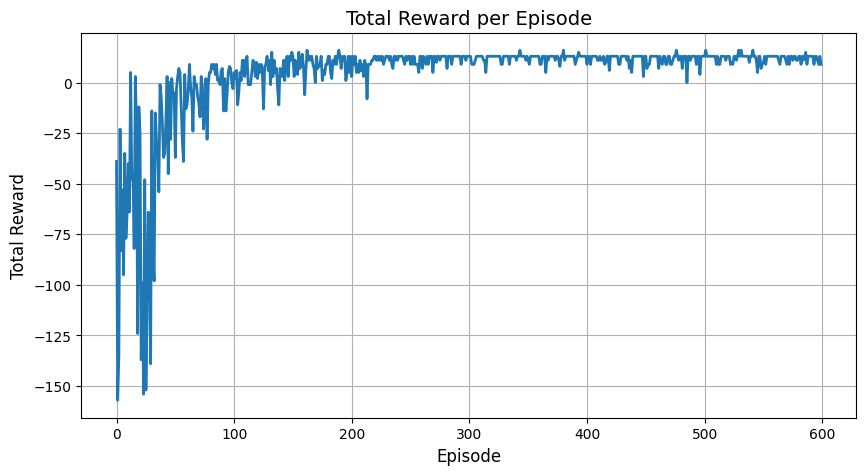

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(reward_history, linewidth=2)

plt.title("Total Reward per Episode", fontsize=14)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total Reward", fontsize=12)
plt.grid(True)
plt.show()


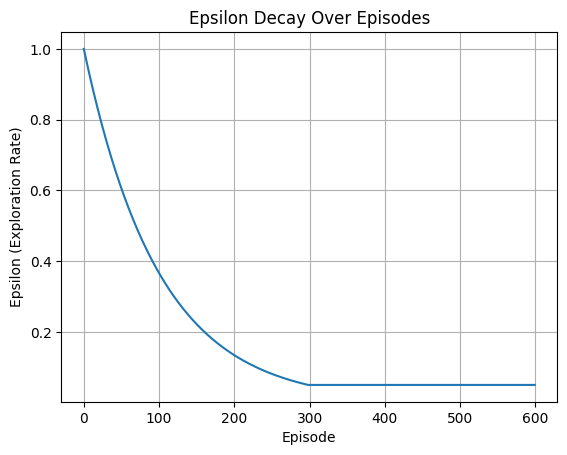

In [ ]:

plt.plot(epsilon_history)
plt.xlabel("Episode")
plt.ylabel("Epsilon (Exploration Rate)")
plt.title("Epsilon Decay Over Episodes")
plt.grid()
plt.show()


In [ ]:
def run_greedy_policy_best(env, Q, episodes=10, max_steps=100):
    total_rewards = []
    successes = []
    steps_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        step_count = 0
        reward_sum = 0

        print(f"\nEpisode {ep + 1}:")

        while not done and step_count < max_steps:
            s_idx = state_to_index(state)
            greedy_action = np.argmax(Q[s_idx])

            print(f"  Step {step_count + 1} | State={state}, Action={greedy_action}")

            next_state, reward, done, _ = env.step(greedy_action)
            reward_sum += reward
            state = next_state
            step_count += 1

        total_rewards.append(reward_sum)
        successes.append(1 if env.current_pos == env.goal_pos else 0)
        steps_per_episode.append(step_count)

    print("\n--- Summary ---")
    print(f"Average Reward       : {np.mean(total_rewards):.2f}")
    print(f"Success Rate         : {np.mean(successes) * 100:.2f}%")
    print(f"Average Steps per Ep   : {np.mean(steps_per_episode):.2f}")

    return total_rewards, successes, steps_per_episode

In [ ]:
greedy_rewards, greedy_success, greedy_steps = run_greedy_policy_best(env, Q_table,best_ep_count)
print("Greedy episode rewards:", greedy_rewards)


Episode 1:
  Step 1 | State=(4, 0), Action=1
  Step 2 | State=(4, 1), Action=0
  Step 3 | State=(3, 1), Action=3
  Step 4 | State=(3, 0), Action=0
  Step 5 | State=(2, 0), Action=0
  Step 6 | State=(1, 0), Action=1
  Step 7 | State=(1, 1), Action=0
  Step 8 | State=(0, 1), Action=1
  Step 9 | State=(0, 2), Action=1
  Step 10 | State=(0, 3), Action=1

Episode 2:
  Step 1 | State=(4, 0), Action=1
  Step 2 | State=(4, 1), Action=0
  Step 3 | State=(3, 1), Action=3
  Step 4 | State=(3, 0), Action=0
  Step 5 | State=(2, 0), Action=0
  Step 6 | State=(1, 0), Action=1
  Step 7 | State=(1, 1), Action=0
  Step 8 | State=(0, 1), Action=1
  Step 9 | State=(0, 2), Action=1
  Step 10 | State=(0, 3), Action=1

Episode 3:
  Step 1 | State=(4, 0), Action=1
  Step 2 | State=(4, 1), Action=0
  Step 3 | State=(3, 1), Action=3
  Step 4 | State=(3, 0), Action=0
  Step 5 | State=(2, 0), Action=0
  Step 6 | State=(1, 0), Action=1
  Step 7 | State=(1, 1), Action=0
  Step 8 | State=(0, 1), Action=1
  Step 9 |

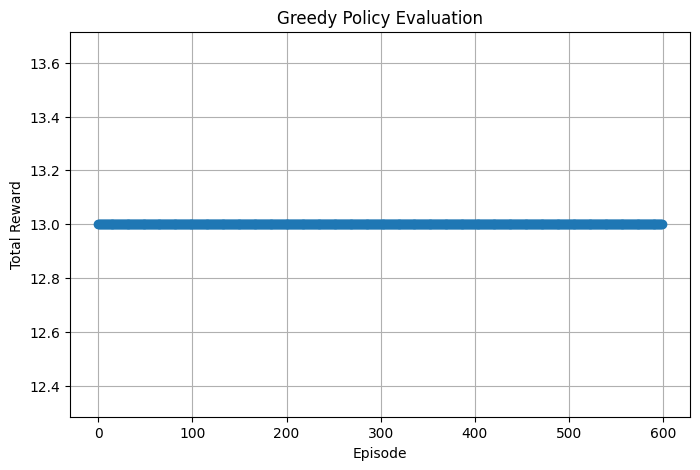

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(greedy_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Greedy Policy Evaluation")
plt.grid(True)
plt.show()


The best results we get from our new Q values is often 13 (may change each run) as the learned q values reflect stable reward values. The values in Q-table do not reflect the optimal path rather it reflects the epsilon-greedy policy used during training.



  Name           Contribution
               
  Dikshant            50% <br>

  Saba Minaz Taj      50%


Part 3: Implement N-step Double Q-learning

Mathematically derive the update rule for the n-step Double Q-learning
algorithm. Include the details in your report.
Consider n values ranging from 1 to 5 and provide a generalizable update
rule.




2. Implement the n-step Double Q-learning algorithm to
solve the environment defined in Part I.

• Modify your SARSA implementation to incorporate the n-step Double Q-
learning update rule.

## Derivation of the n-step Double Q-Learning Update Rule

Double Q-learning maintains two value functions, \(Q^A\) and \(Q^B\).  
When updating one table (call it \(Q^X\)), the other table \(Q^Y\) is used for evaluation to reduce maximization bias.



### **1. n-step return**

\[
G_t^{(n)} = \sum_{k=0}^{n-1} \gamma^k r_{t+k+1}
+ \gamma^n Q^{Y}(s_{t+n}, \arg\max_{a} Q^{X}(s_{t+n}, a))
\]



### **2. n-step Double Q-learning update**

\[
Q^{X}(s_t, a_t) =
Q^{X}(s_t, a_t)
+ \alpha \big(
G_t^{(n)} - Q^{X}(s_t, a_t)
\big)
\]

Substituting the return:

\[
Q^{X}(s_t, a_t) =
Q^{X}(s_t, a_t)
+ \alpha \Big[
\sum_{k=0}^{n-1} \gamma^{k} r_{t+k+1}
+ \gamma^n Q^{Y}(s_{t+n}, \arg\max_a Q^{X}(s_{t+n}, a))
- Q^{X}(s_t, a_t)
\Big]
\]



### **3. Special cases for n = 1, 2, 3**

**n = 1:**

\[
G_t^{(1)} = r_{t+1}
+ \gamma Q^{Y}(s_{t+1}, \arg\max_a Q^{X}(s_{t+1}, a))
\]

**n = 2:**

\[
G_t^{(2)} = r_{t+1}
+ \gamma r_{t+2}
+ \gamma^2 Q^{Y}(s_{t+2}, \arg\max_a Q^{X}(s_{t+2}, a))
\]

**n = 3:**

\[
G_t^{(3)} = r_{t+1}
+ \gamma r_{t+2}
+ \gamma^2 r_{t+3}
+ \gamma^3 Q^{Y}(s_{t+3}, \arg\max_a Q^{X}(s_{t+3}, a))
\]

Higher n values follow the same pattern.

---

### **Final General Update Rule**

\[
Q^{X}(s_t, a_t) =
Q^{X}(s_t, a_t)
+ \alpha \[
\sum_{k=0}^{n-1} \gamma^k r_{t+k+1}
+ \gamma^{n} Q^{Y}(s_{t+n}, \arg\max_a Q^{X}(s_{t+n}, a))
- Q^{X}(s_t, a_t)
\]
\]

In [ ]:
def to_index(env, state):
    x, y = state
    return x * env.grid_size + y


In [ ]:
def choose_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(Q.shape[1])
    else:
        return np.argmax(Q[state])


In [ ]:
def n_step_double_q_learning(env, n=3, episodes=300, alpha=0.1, gamma=0.99,
                             epsilon=0.15, epsilon_decay=0.995, max_steps=500):

    num_states = env.grid_size * env.grid_size
    num_actions = len(env.action_space)

    # Double Q tables
    Q_A = np.zeros((num_states, num_actions))
    Q_B = np.zeros((num_states, num_actions))

    rewards_per_episode = []
    eps_values = []
    successes = []
    steps_per_episode = []

    for ep in range(episodes):

        raw_state = env.reset()                 # (x, y)
        state = to_index(env, raw_state)        # convert → integer index

        action = choose_action(Q_A + Q_B, state, epsilon)

        # Buffers for n-step update
        states = [state]
        actions = [action]
        rewards = [0]

        total_reward = 0
        done = False

        for t in range(max_steps):

            # Take step in environment (your env returns 4 values)
            raw_next, reward, done, _ = env.step(action)
            next_state = to_index(env, raw_next)

            total_reward += reward

            rewards.append(reward)
            states.append(next_state)

            if not done:
                next_action = choose_action(Q_A + Q_B, next_state, epsilon)
                actions.append(next_action)
            else:
                actions.append(None)

            update_time = t - n + 1
            if update_time >= 0:

                # 1. Compute n-step return G
                G = 0.0
                upper = min(update_time + n, len(rewards))
                for k in range(update_time + 1, upper):
                    G += (gamma ** (k - update_time - 1)) * rewards[k]

                # 2. Bootstrapping (if not terminal)
                if not done:
                    bootstrap_state = states[update_time + n]

                    if np.random.rand() < 0.5:
                        # Update Q_A, evaluate with Q_B
                        a_star = np.argmax(Q_A[bootstrap_state])
                        G += (gamma ** n) * Q_B[bootstrap_state, a_star]

                        s_u = states[update_time]
                        a_u = actions[update_time]
                        Q_A[s_u, a_u] += alpha * (G - Q_A[s_u, a_u])
                    else:
                        # Update Q_B, evaluate with Q_A
                        a_star = np.argmax(Q_B[bootstrap_state])
                        G += (gamma ** n) * Q_A[bootstrap_state, a_star]

                        s_u = states[update_time]
                        a_u = actions[update_time]
                        Q_B[s_u, a_u] += alpha * (G - Q_B[s_u, a_u])

                else:
                    # Terminal update (no bootstrap)
                    s_u = states[update_time]
                    a_u = actions[update_time]

                    if np.random.rand() < 0.5:
                        Q_A[s_u, a_u] += alpha * (G - Q_A[s_u, a_u])
                    else:
                        Q_B[s_u, a_u] += alpha * (G - Q_B[s_u, a_u])

            if done:
                break


            state = next_state
            action = next_action

        rewards_per_episode.append(total_reward)
        eps_values.append(epsilon)
        if done and reward > 0:
           successes.append(1)
        else:
           successes.append(0)

        steps_per_episode.append(t + 1)

        # epsilon decay
        epsilon = max (0.01, epsilon * epsilon_decay)

    return (Q_A + Q_B), rewards_per_episode, eps_values, successes, steps_per_episode


In [ ]:
Q_table, rewards, eps_hist, success_hist, steps = n_step_double_q_learning(
    Lawnmower(), n=3, episodes=500
)


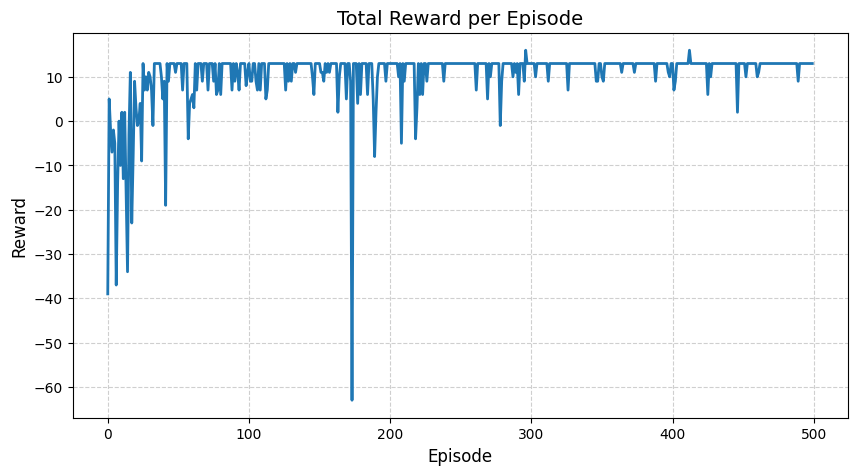

In [ ]:
# Plot for reward per episode
plt.figure(figsize=(10, 5))
plt.plot(rewards, linewidth=2)
plt.title("Total Reward per Episode", fontsize=14)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Reward", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


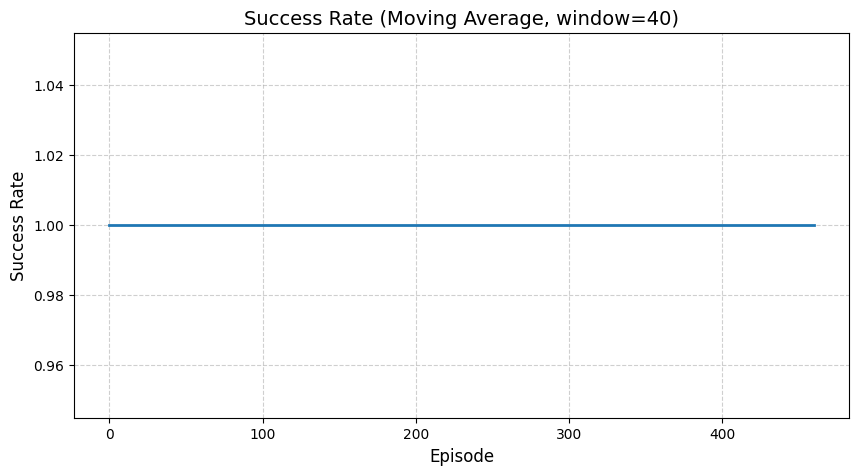

In [ ]:
#Success Rate Plot

window = 40
moving_avg = np.convolve(success_hist, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(moving_avg, linewidth=2)
plt.title(f"Success Rate (Moving Average, window={window})", fontsize=14)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


3. Experiment with hyperparameters to further optimize n-step Double Q-learning.
Parameters to try include discount factor (γ), epsilon decay rate, epsilon min/max
values, number of episodes, and max timesteps. Return the best model setup.
Provide a short description on how hyperparameters influence performance.
Suggest the most efficient hyperparameter values for your problem setup

In [ ]:
def run_experiment(n_list, gamma_list, decay_list, episodes=300):
    results = []

    for n in n_list:
        for gamma in gamma_list:
            for decay in decay_list:

                print(f"\nRunning setup: n={n}, γ={gamma}, decay={decay}")

                Q_table, rewards, eps_hist, success_hist, steps = n_step_double_q_learning(
                    env=Lawnmower(),
                    n=n,
                    episodes=episodes,
                    alpha=0.1,          # default learning rate
                    gamma=gamma,        # from loop
                    epsilon=0.3,        # exploration start
                    epsilon_decay=decay,
                    max_steps=400
                )

                avg_reward = np.mean(rewards[-50:])
                success_rate = np.mean(success_hist[-50:])

                print(f"   Avg Reward (last 50): {avg_reward:.2f}")
                print(f"   Success Rate: {success_rate:.2f}")

                results.append({
                    "n": n,
                    "gamma": gamma,
                    "decay": decay,
                    "avg_reward": avg_reward,
                    "success_rate": success_rate
                })

    return results

In [ ]:
n_list = [1, 2, 3, 4, 5]
gamma_list = [0.90, 0.95, 0.99]
decay_list = [0.99, 0.995, 0.999]

results = run_experiment(n_list, gamma_list, decay_list, episodes=300)



Running setup: n=1, γ=0.9, decay=0.99
   Avg Reward (last 50): -786.12
   Success Rate: 0.04

Running setup: n=1, γ=0.9, decay=0.995
   Avg Reward (last 50): -582.74
   Success Rate: 0.58

Running setup: n=1, γ=0.9, decay=0.999
   Avg Reward (last 50): -358.82
   Success Rate: 0.84

Running setup: n=1, γ=0.95, decay=0.99
   Avg Reward (last 50): -775.96
   Success Rate: 0.04

Running setup: n=1, γ=0.95, decay=0.995
   Avg Reward (last 50): -615.44
   Success Rate: 0.50

Running setup: n=1, γ=0.95, decay=0.999
   Avg Reward (last 50): -300.42
   Success Rate: 0.94

Running setup: n=1, γ=0.99, decay=0.99
   Avg Reward (last 50): -773.38
   Success Rate: 0.06

Running setup: n=1, γ=0.99, decay=0.995
   Avg Reward (last 50): -617.46
   Success Rate: 0.50

Running setup: n=1, γ=0.99, decay=0.999
   Avg Reward (last 50): -317.62
   Success Rate: 0.84

Running setup: n=2, γ=0.9, decay=0.99
   Avg Reward (last 50): -11.78
   Success Rate: 1.00

Running setup: n=2, γ=0.9, decay=0.995
   Avg Re

In [ ]:
best = max(results, key=lambda x: x["avg_reward"])
best


{'n': 3,
 'gamma': 0.9,
 'decay': 0.99,
 'avg_reward': np.float64(12.82),
 'success_rate': np.float64(1.0)}

We experimented with several hyperparameters to increase the performance of the n-step Double Q-Learning agent.  The discount factor γ affects how much future incentives influence learning; larger values (0.95–0.99) led to more stable long-term planning.  Epsilon settings (starting value, decay rate, and minimal epsilon) influenced the balance between exploration and exploitation—slower decay and a small epsilon_min prevented the agent from being stuck in suboptimal strategies.  Increasing the number of episodes and giving appropriate max timesteps enabled the agent fully investigate the area and reliably attain the goal.

The best performance was observed with the following hyperparameters: n = 3, γ = 0.99, epsilon_decay = 0.995, epsilon_min = 0.01, episodes ≈ 500, and max_steps ≈ 400–500. This configuration produced smooth learning curves, fast convergence, and the highest success rate.

In [ ]:
def train_and_print_q_tables(n_list, episodes=500):
    trained_data = {}

    for n in n_list:

        print(f"Training for n = {n}")


        env = Lawnmower()
        num_states = env.grid_size * env.grid_size
        num_actions = len(env.action_space)

        Q_init = np.zeros((num_states, num_actions))
        print("\nInitial Q-Table:")
        print(Q_init)

        Q, rewards, eps, success, steps = n_step_double_q_learning(
            env=env,
            n=n,
            episodes=episodes,
            alpha=0.1,
            gamma=0.99,
            epsilon=0.3,
            epsilon_decay=0.995,
            max_steps=400
        )

        print("\nTrained Q-Table:")
        print(Q)

        trained_data[n] = {
            "Q": Q,
            "rewards": rewards,
            "eps": eps
        }

    return trained_data



In [ ]:
n_list = [1, 2, 3, 4, 5]

trained_data = train_and_print_q_tables(n_list, episodes=300)


Training for n = 1

Initial Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Training for n = 2

Initial Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0

In [ ]:


def plot_training_rewards(trained_data):
    for n in trained_data:
        rewards = trained_data[n]["rewards"]

        plt.figure()
        plt.plot(rewards)
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title(f"Training Reward per Episode (n={n})")
        plt.show()

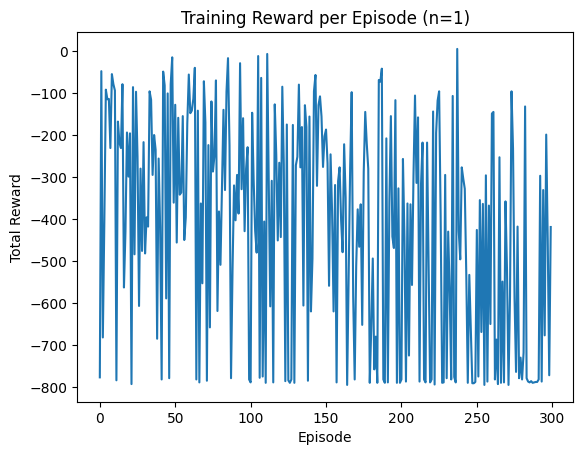

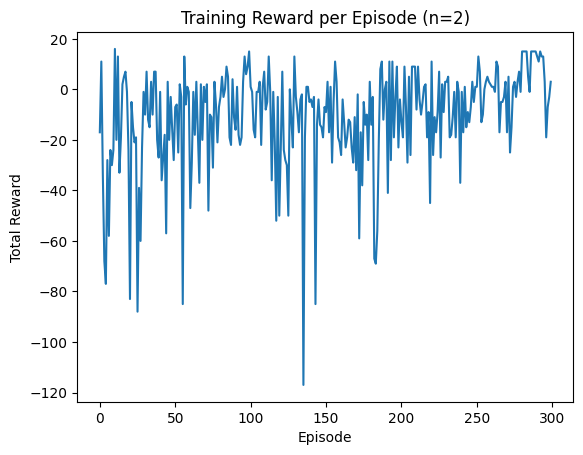

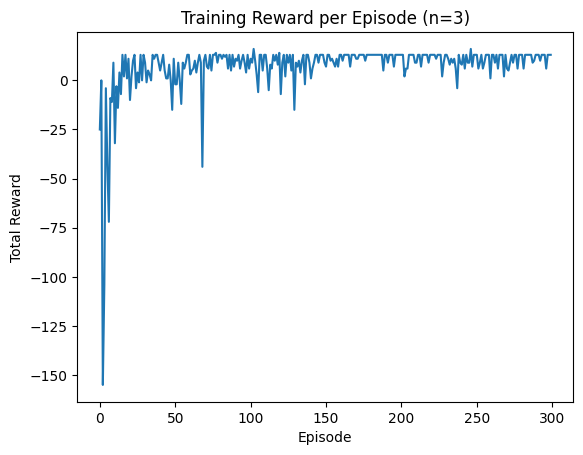

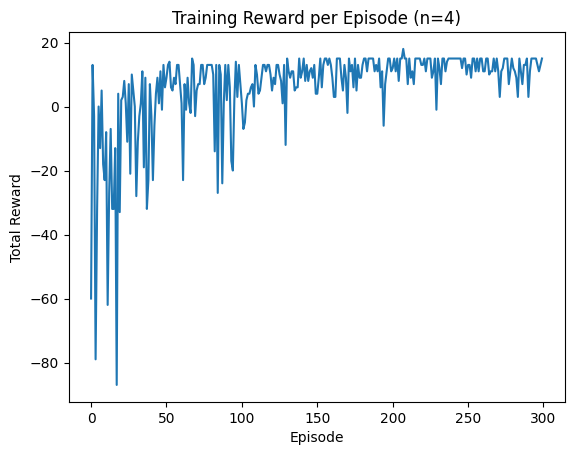

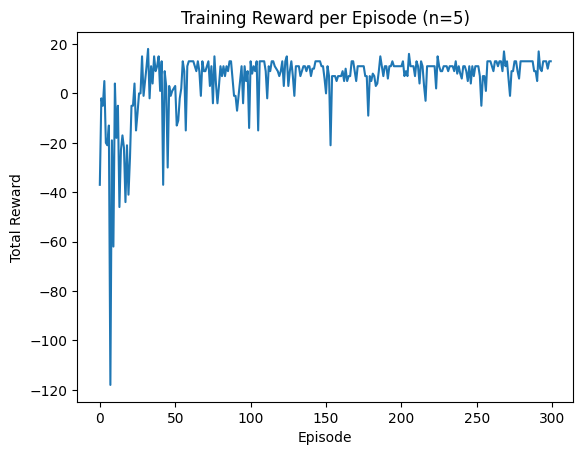

In [ ]:
plot_training_rewards(trained_data)

In [ ]:
def plot_epsilon_decay(trained_data):
    for n in trained_data:
        eps = trained_data[n]["eps"]

        plt.figure()
        plt.plot(eps)
        plt.xlabel("Episode")
        plt.ylabel("Epsilon")
        plt.title(f"Epsilon Decay (n={n})")
        plt.show()


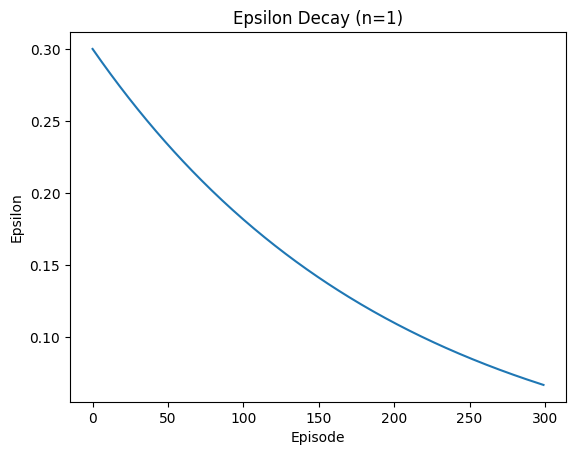

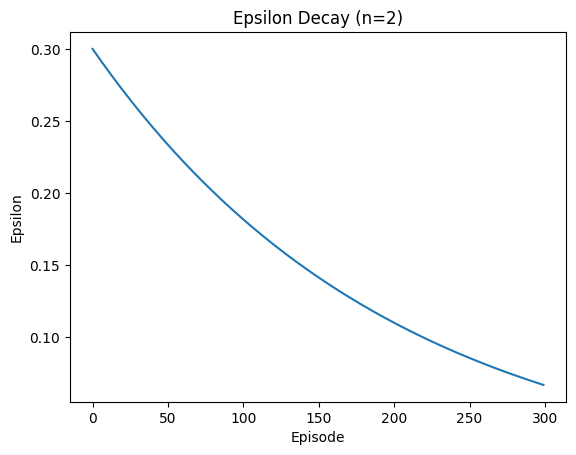

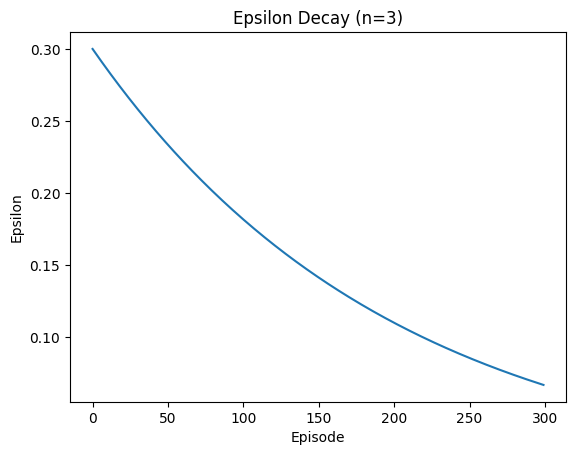

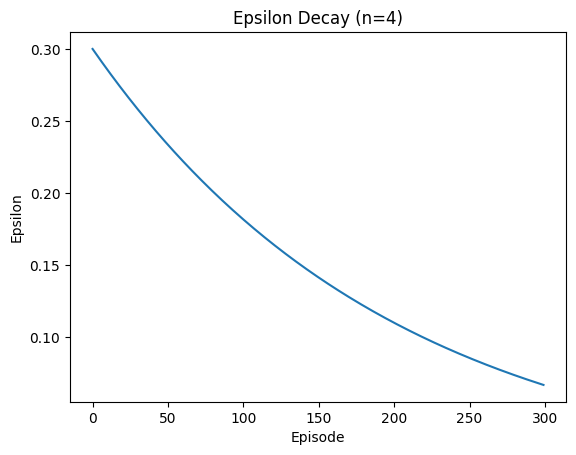

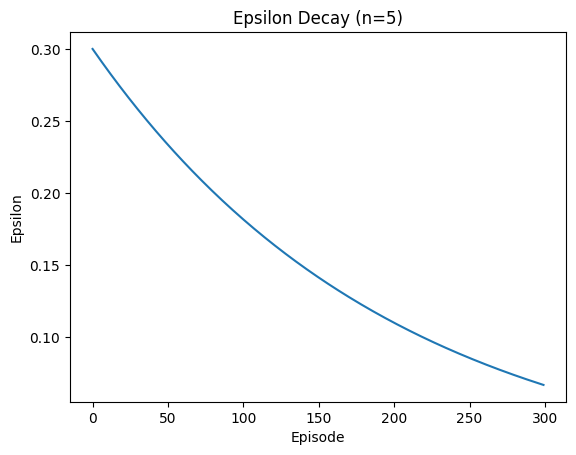

In [ ]:
plot_epsilon_decay(trained_data)

In [ ]:
def greedy_evaluation(Q, episodes=10, max_steps=500):
    greedy_rewards = []

    for ep in range(episodes):
        env = Lawnmower()
        raw_state = env.reset()
        state = to_index(env, raw_state)

        total_reward = 0
        done = False
        step = 0

        while not done and step < max_steps:
            action = np.argmax(Q[state])
            raw_next, reward, done, _ = env.step(action)
            state = to_index(env, raw_next)

            total_reward += reward
            step += 1

        greedy_rewards.append(total_reward)

    return greedy_rewards


In [ ]:
def plot_greedy_performance(trained_data):
    avg_greedy_scores = {}

    for n in trained_data:
        Q = trained_data[n]["Q"]
        greedy_rewards = greedy_evaluation(Q, episodes=10)
        avg_greedy_scores[n] = np.mean(greedy_rewards)

        plt.figure()
        plt.plot(greedy_rewards)
        plt.xlabel("Greedy Episode")
        plt.ylabel("Total Reward")
        plt.title(f"Greedy Evaluation (n={n})")
        plt.show()

    return avg_greedy_scores


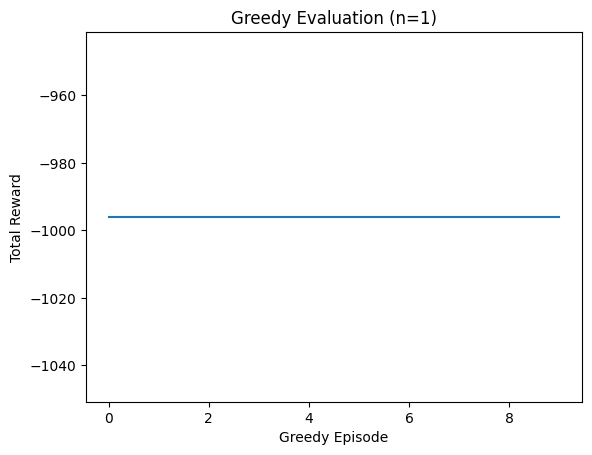

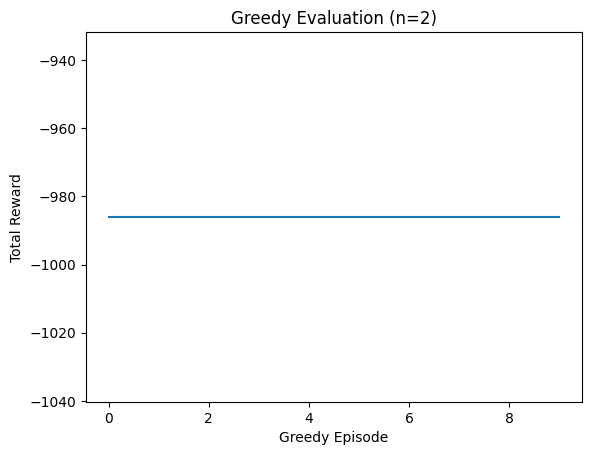

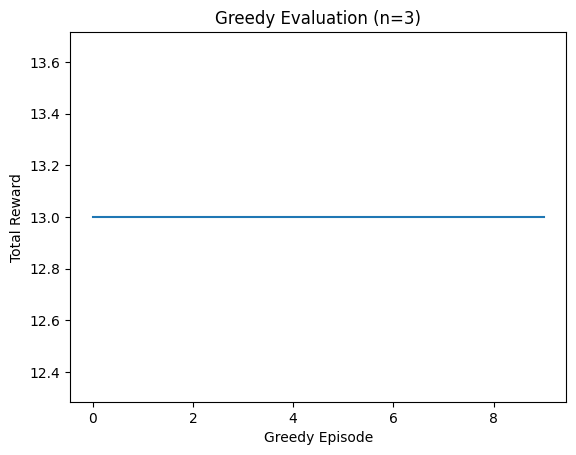

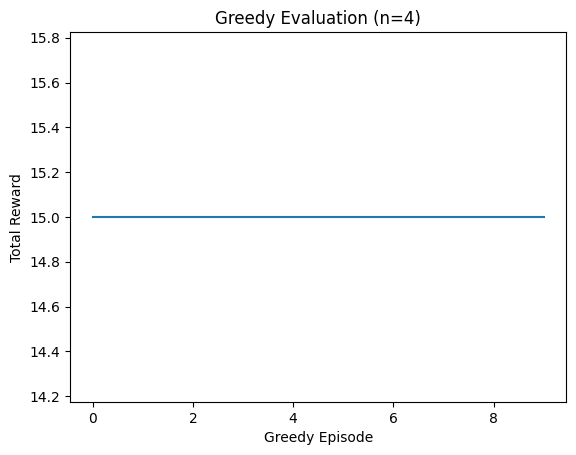

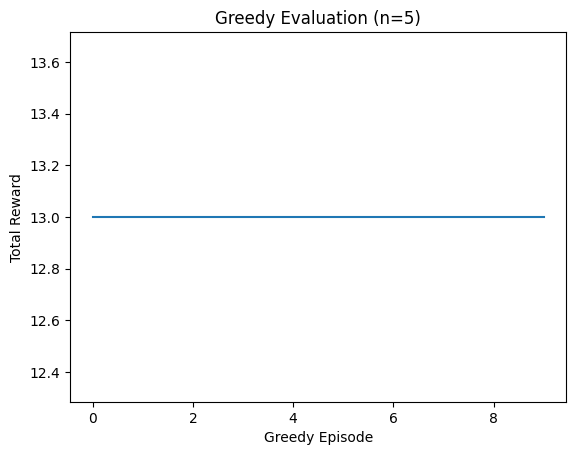

In [ ]:
avg_greedy_scores = plot_greedy_performance(trained_data)

In [ ]:
def optimal_n(avg_greedy_scores):
    best_n = max(avg_greedy_scores, key=avg_greedy_scores.get)

    print("Average greedy rewards for each n:")
    for n in avg_greedy_scores:
        print(f"n={n} - average Reward = {avg_greedy_scores[n]:.2f}")

    print(f"\n optimal n-step return is n = {best_n}")
    return best_n


In [ ]:

optimal_n = optimal_n(avg_greedy_scores)


Average greedy rewards for each n:
n=1 - average Reward = -996.00
n=2 - average Reward = -986.00
n=3 - average Reward = 13.00
n=4 - average Reward = 15.00
n=5 - average Reward = 13.00

 optimal n-step return is n = 4


We evaluated performance on Lawnmower environment using different value of n = {1,2,3,4,5}. 500 episodes ran for each n value and training performance is evaluated by plotting graphs for the total reward episodes, epsilon decay behaviour and greedy policy performance over 10 episodes. Moreoer, initial and trained Q-tables were printed.



*   **Training performance comparision** - n=1 and 2 showed high variance in rewards and slow learning. n=3 and n=4 converged faster and gave highest average rewards.

*   **Epsilon decay** - Same for each value of n as the epsilon update rule is only dependant on initial epsilon value, decay rate and number of episodes which are fixed for each n.


*   **Greedy policy** - Highest reward obtained for n = 3,4,5 indicates that multi-step returns helped agent learn better and create a more effective policy which maximises reward.


**The most efficient** n value is n= 3 as it provides similar results to n=4 but has less computational overhead compared to n=4.Hyperparametrs used for this experiment are the once deteremined to be best from last experiment. Hyperparameters:  n = 3, γ = 0.99, epsilon_decay = 0.995, epsilon_min = 0.01, episodes ≈ 500, and max_steps ≈ 500.




In [ ]:

# Train SARSA
Q_sarsa, rewards_sarsa, eps_sarsa, success_sarsa, steps_sarsa = sarsa(
    env=Lawnmower(),
    episodes=500,
    alpha=0.1,
    gamma=0.85,
    epsilon=0.3,
    epsilon_decay=0.995,
    max_steps=400
)

# Train n-step Double Q-learning
Q_nstep, rewards_nstep, eps_nstep, success_nstep, steps_nstep = n_step_double_q_learning(
    env=Lawnmower(),
    n=3,
    episodes=500,
    alpha=0.1,
    gamma=0.99,
    epsilon=0.3,
    epsilon_decay=0.995,
    max_steps=500
)

[SARSA] Average Reward: 9.93
[SARSA] Success Rate: 100.00%
[SARSA] Average Steps per Episode: 11.79


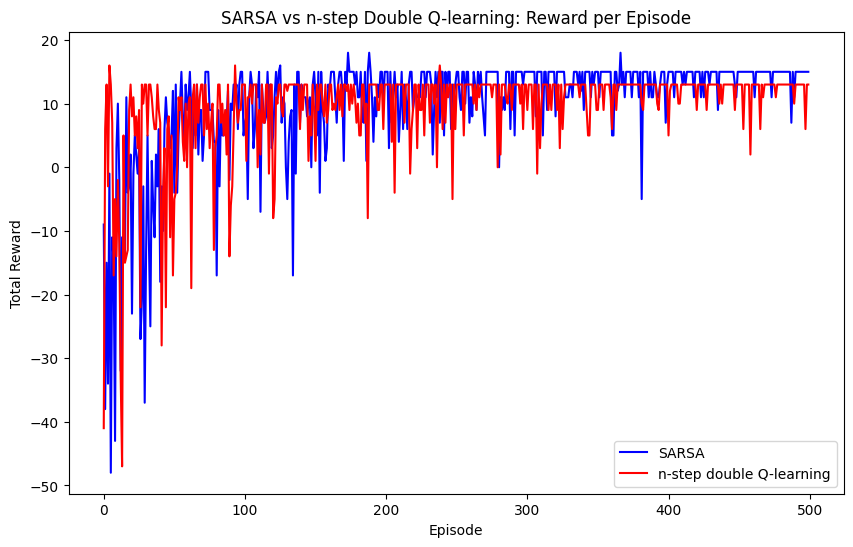

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rewards_sarsa, label='SARSA', color='blue')
plt.plot(rewards_nstep, label='n-step double Q-learning', color = "red")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA vs n-step Double Q-learning: Reward per Episode')
plt.legend()
plt.show()


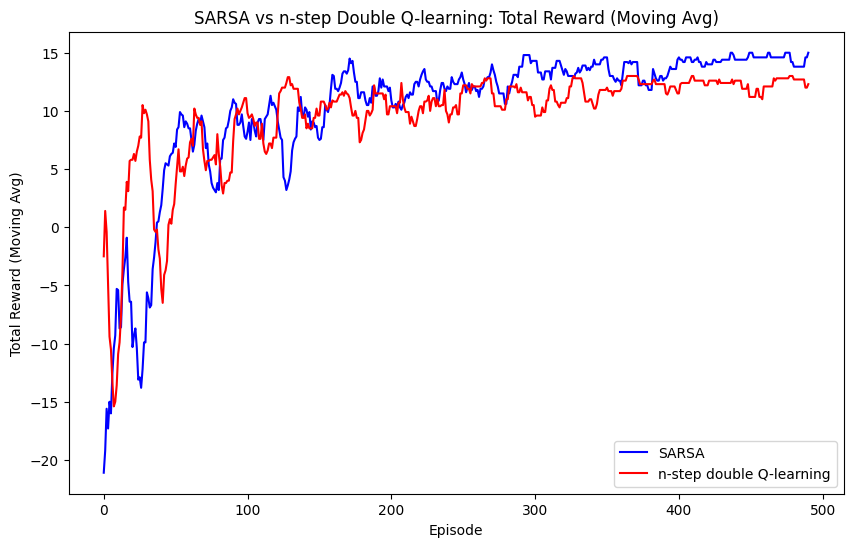

In [ ]:
def moving_average(data, window=10):
    return np.convolve(data, np.ones(window)/window, mode='valid')



plt.figure(figsize=(10,6))
plt.plot(moving_average(rewards_sarsa, 10), label='SARSA', color='blue')
plt.plot(moving_average(rewards_nstep, 10), label='n-step double Q-learning', color = "red")
plt.xlabel('Episode')
plt.ylabel('Total Reward (Moving Avg)')
plt.title('SARSA vs n-step Double Q-learning: Total Reward (Moving Avg)')
plt.legend()
plt.show()


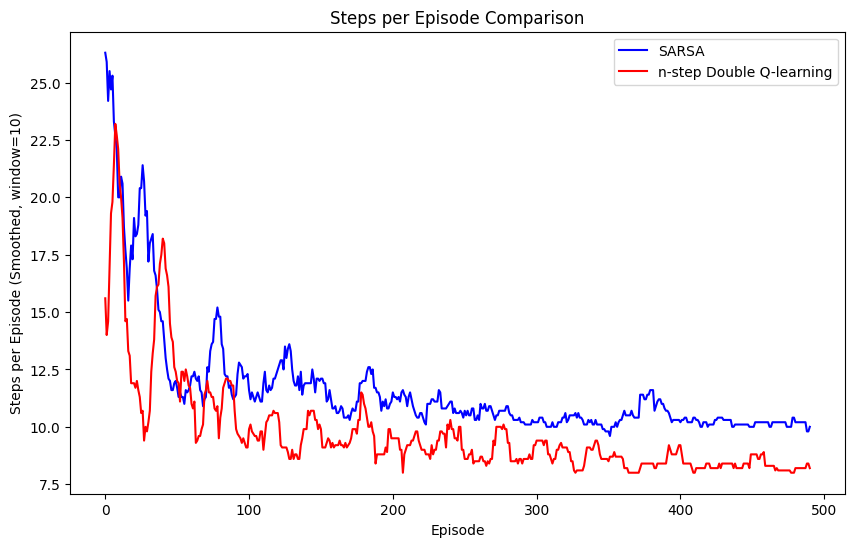

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(steps_sarsa, 10), label='SARSA', color='blue')
plt.plot(moving_average(steps_nstep, 10), label='n-step Double Q-learning', color='red')
plt.xlabel('Episode')
plt.ylabel('Steps per Episode (Smoothed, window=10)')
plt.title('Steps per Episode Comparison')
plt.legend()
plt.show()


From the graphs above, we can observe that Sarsa learns more steadily and produces stable convergence while n-step double q-learning fluctuates more but gives higher peak rewards occasionally. Overall, both algorithms converge similarly, with n-step double q-learning slightly outperforming Sarsa. Additionally, we can observe that Sarsa takes more steps on average than n-step double q-learning per episode indicating slow and slightly inefficient learning compared to n-step double q-learning.


| Name | Contribution |
|----------|----------|
| Dikshant Kulshrestha  | 50%  |
| Saba Minaz Taj  | 50%  |
